In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.loadtxt('pca_data.txt')

In [13]:
d_mean=np.mean(data,axis=0)
d_std=np.std(data,axis=0)
standardized_data=(data-d_mean)/d_std

In [14]:
cov_matrix = np.cov(standardized_data, rowvar=False)

In [15]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [16]:
top_2_eigenvectors = eigenvectors[:, :2]

In [17]:
projected_data = np.dot(standardized_data, top_2_eigenvectors)

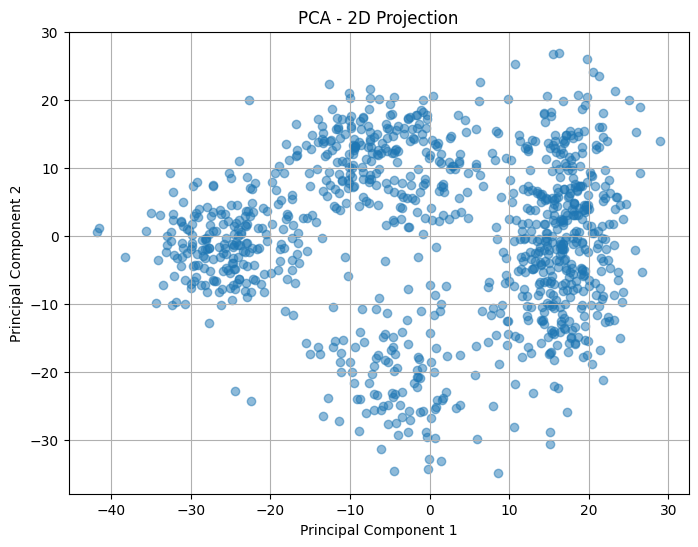

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

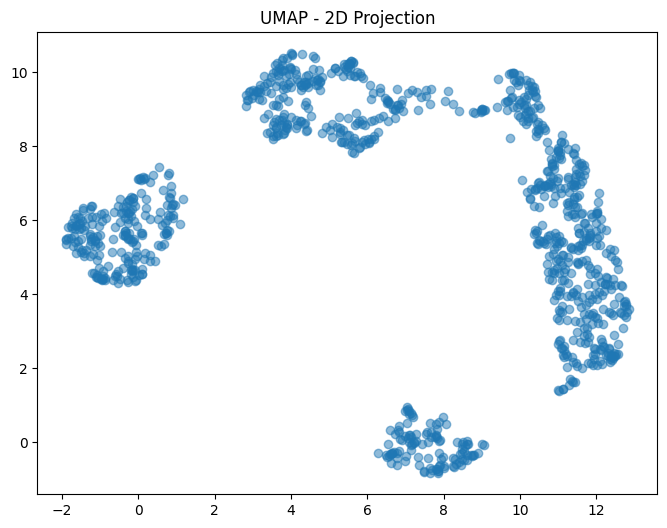

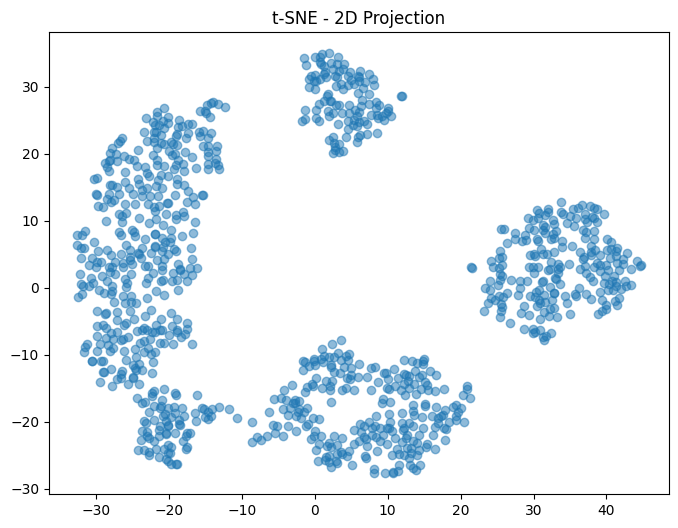

In [19]:
import umap.umap_ as umap
from sklearn.manifold import TSNE

# UMAP
umap_projection = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(standardized_data)

# t-SNE
tsne_projection = TSNE(n_components=2, random_state=42).fit_transform(standardized_data)

# Plot UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], alpha=0.5)
plt.title("UMAP - 2D Projection")
plt.show()

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_projection[:, 0], tsne_projection[:, 1], alpha=0.5)
plt.title("t-SNE - 2D Projection")
plt.show()
